Lab 2, 
In this laboration, we will analyze and model taste preferences based on analytical data that are easily available at the wine certification step using the techniques of multivariate analysis we have learned about in the course. 

Data handling
PCA
FA
LDA
Draw conclusions at each step...

## PCA


In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Matplotlib is building the font cache; this may take a moment.


In [7]:
data_white = pd.read_csv('winequality-white(1).csv', delimiter=";")
data_red = np.genfromtxt('winequality-red(1).csv', delimiter=";",skip_header=1)

#white wine
data_white = data_white.iloc[:,:]
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
pca_toy = data_white[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "density","pH", "sulphates","alcohol", "quality"]]
pca_toy.head()

#pca_toy.plot.scatter(x='fixed acidity',y='volatile acidity')



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


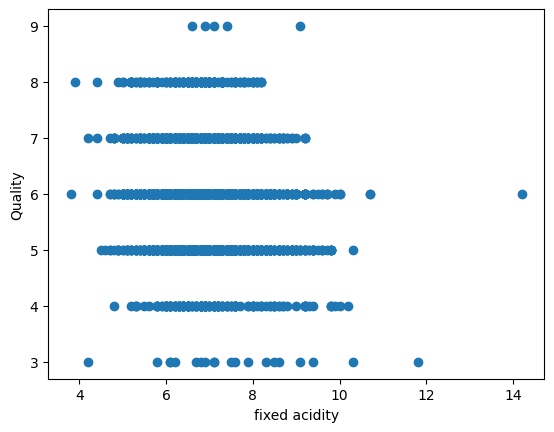

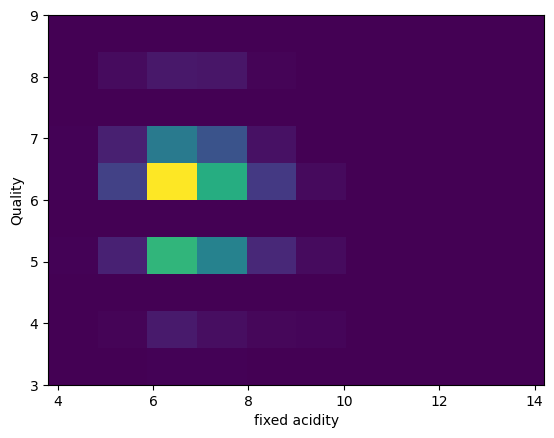

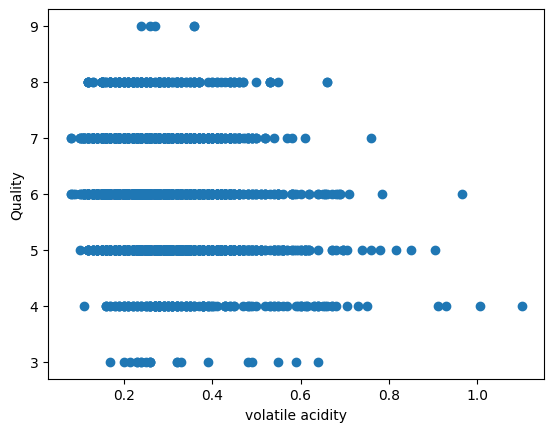

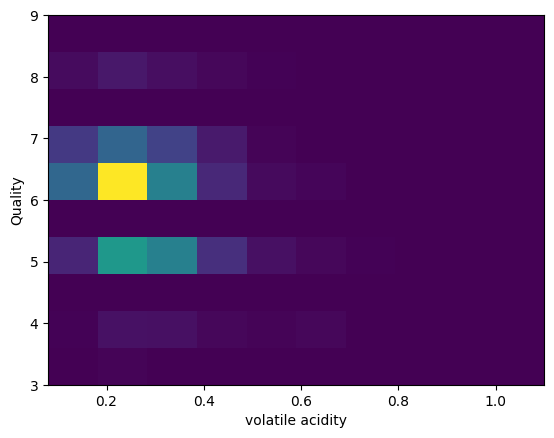

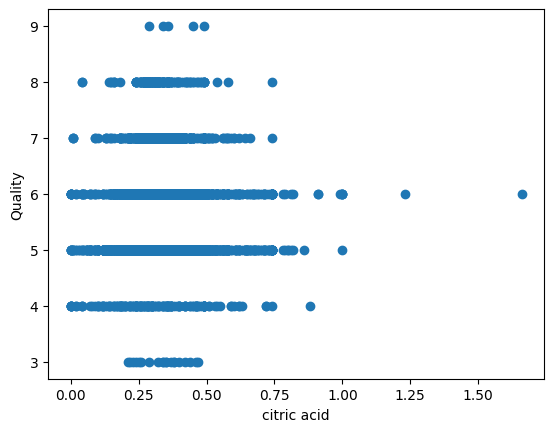

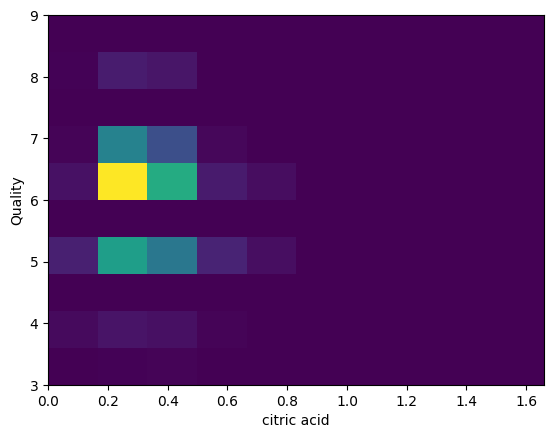

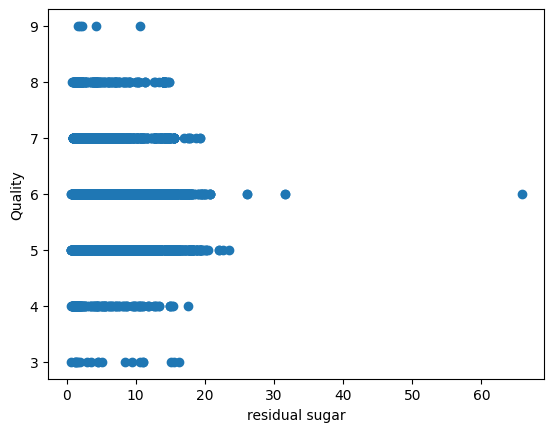

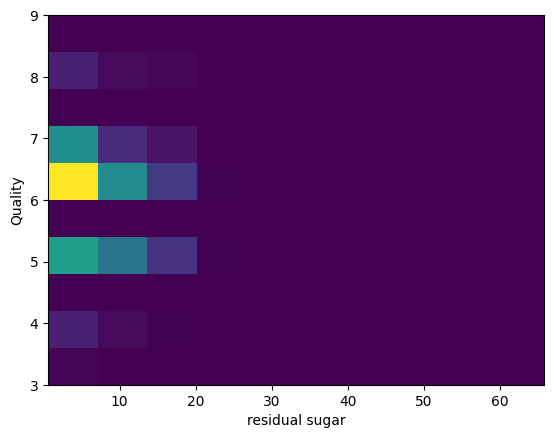

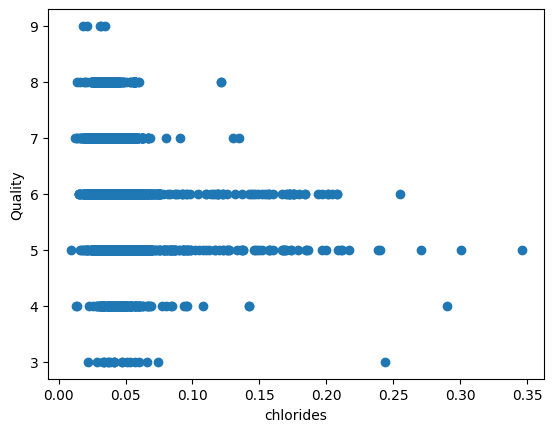

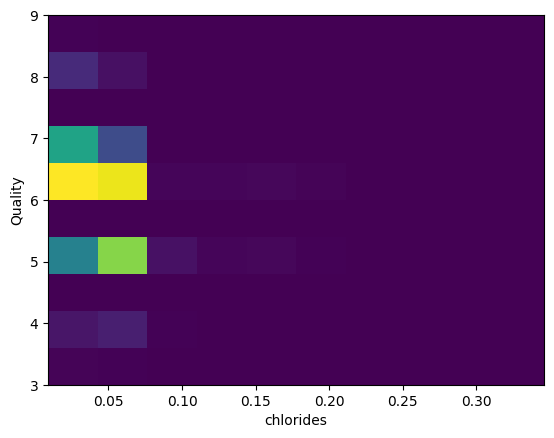

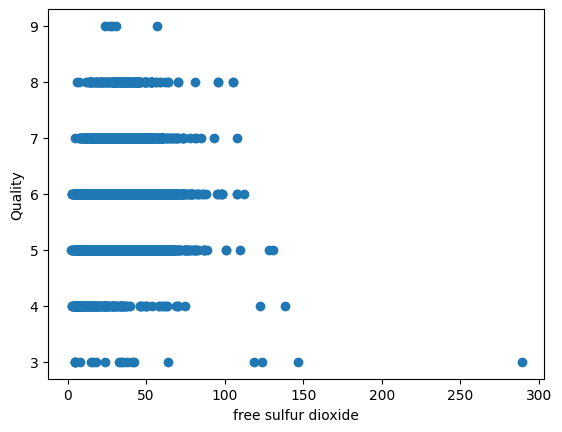

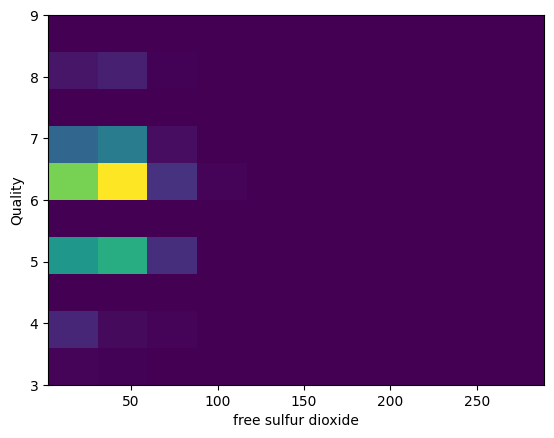

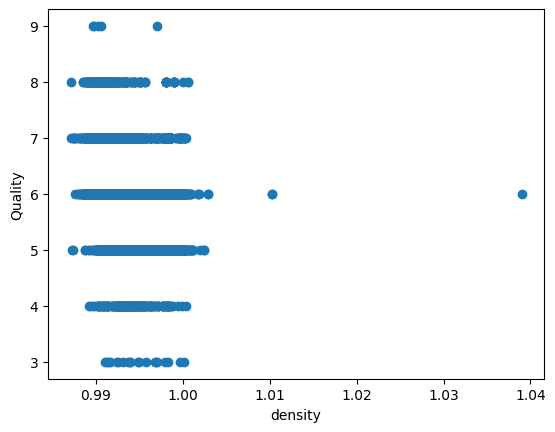

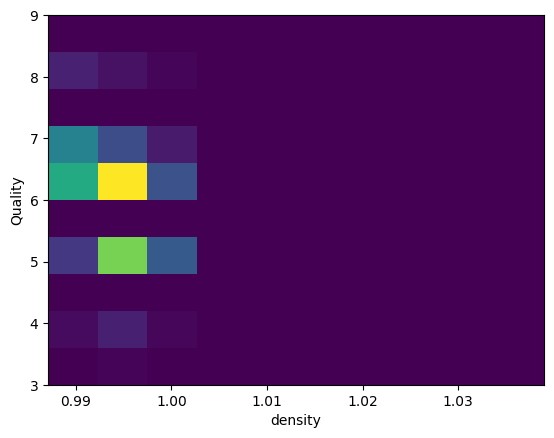

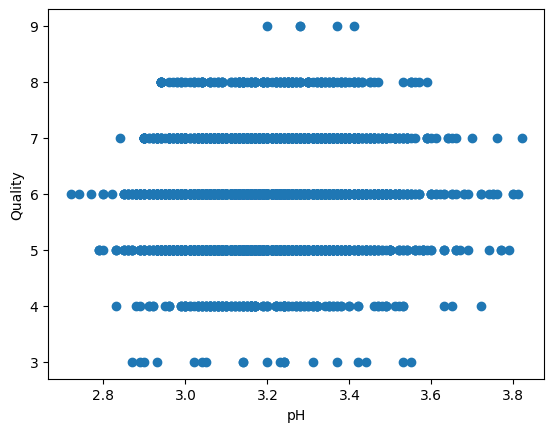

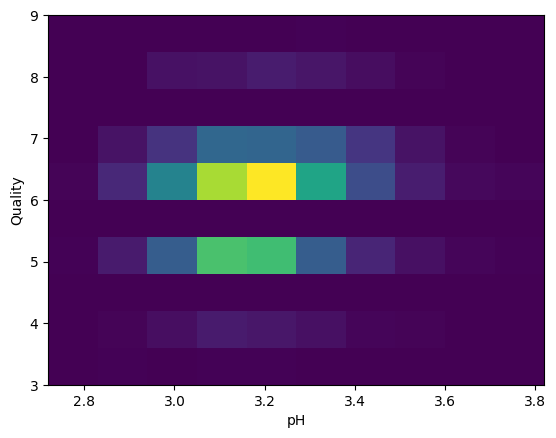

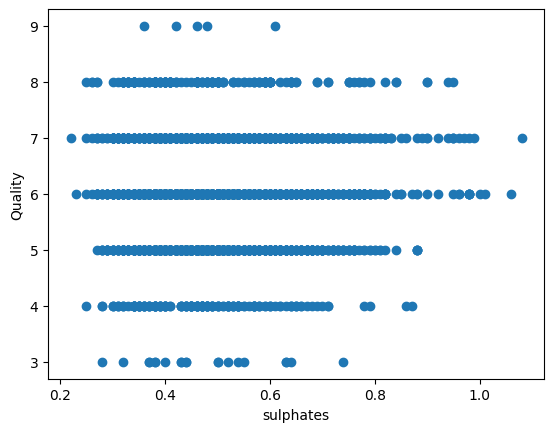

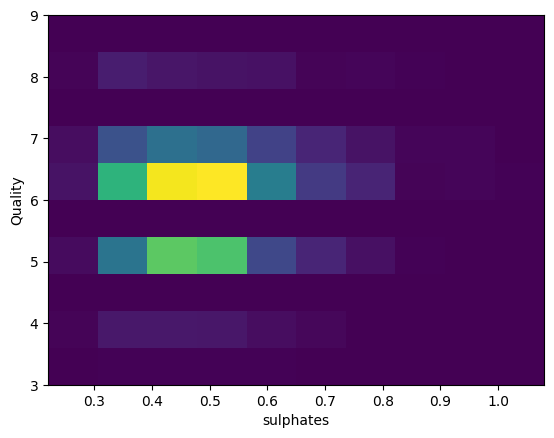

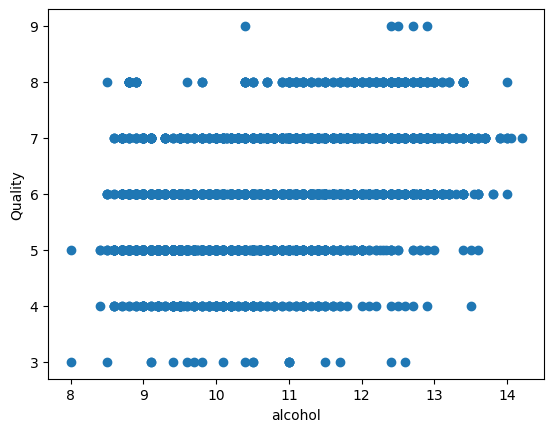

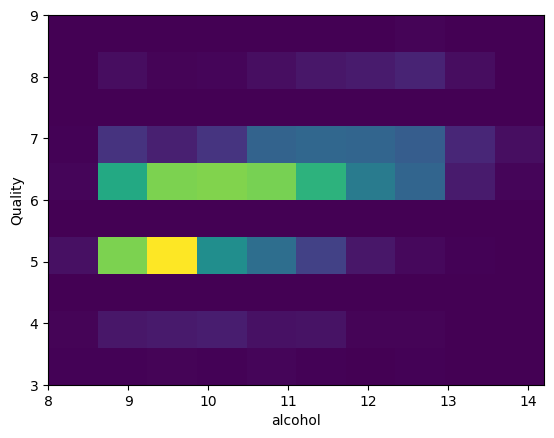

In [9]:
import matplotlib.pyplot as plt
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "density","pH", "sulphates","alcohol"]


for i in features:
    
    plt.scatter(x=data_white[i],y=data_white['quality'])
    plt.ylabel('Quality')
    plt.xlabel(i)
    plt.show()

    plt.hist2d(x=data_white[i],y=data_white['quality'])
    plt.ylabel('Quality')
    plt.xlabel(i)
    plt.show()


scaler = StandardScaler().fit(data_white)
datawhite_scaled = scaler.transform(data_white)
datawhite_scaled=pd.DataFrame(datawhite_scaled,columns=data_white.columns)
datawhite_scaled.head()
import seaborn as sns
#sns.pairplot(datawhite_scaled, corner=True)
datawhite_pca = PCA().fit(datawhite_scaled)


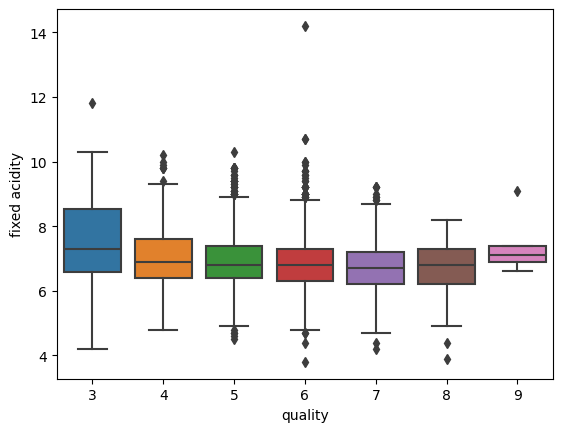

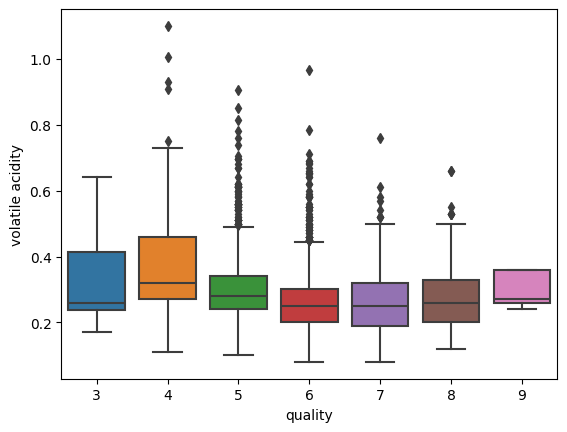

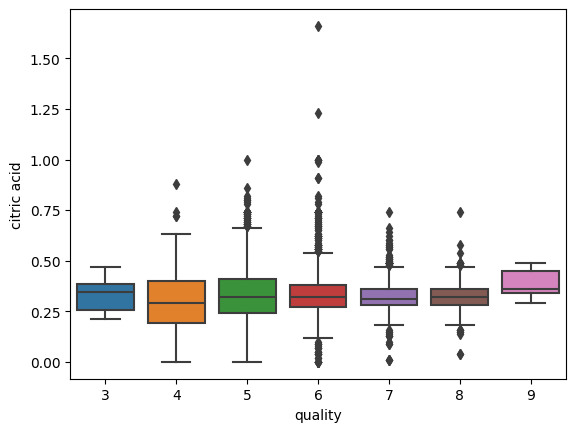

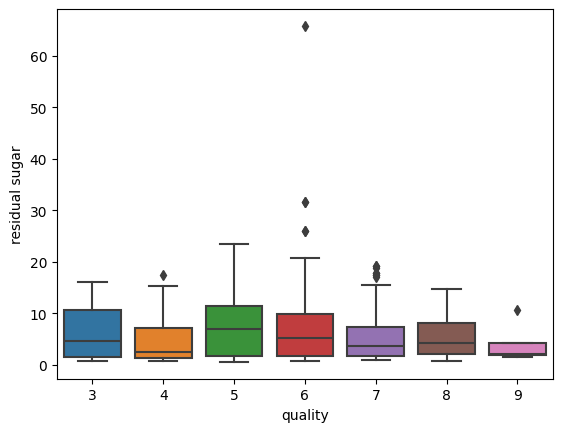

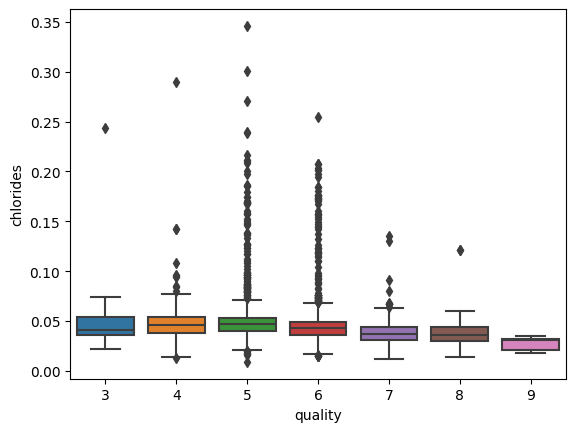

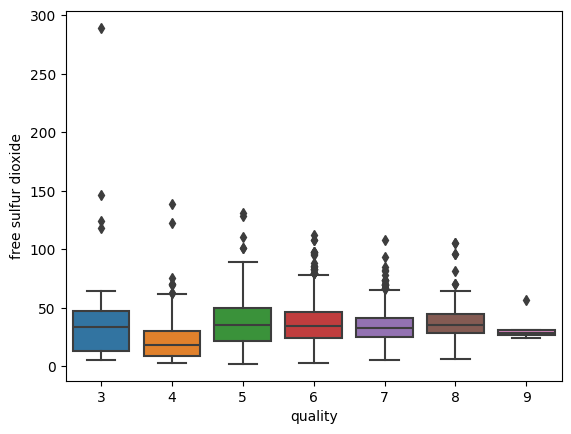

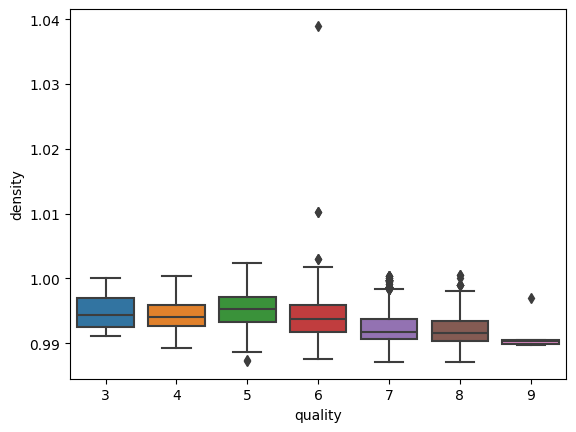

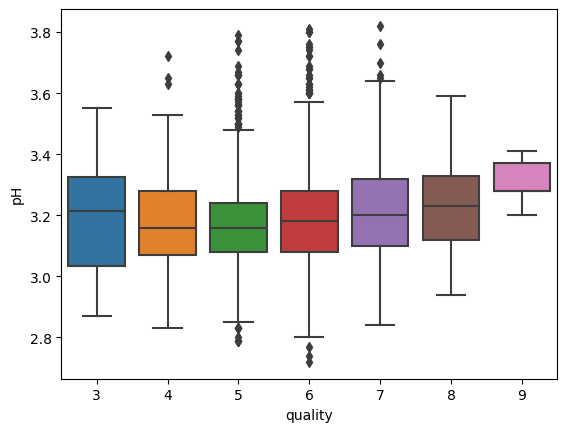

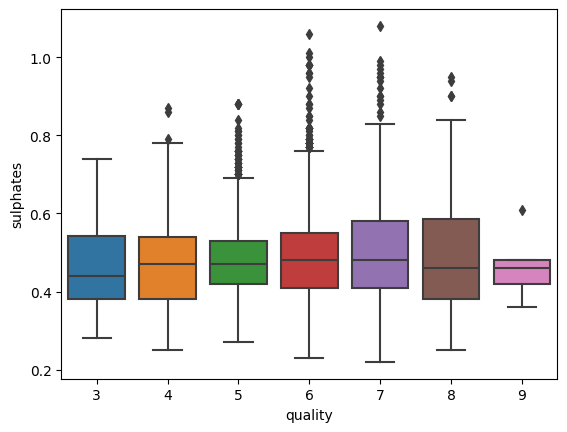

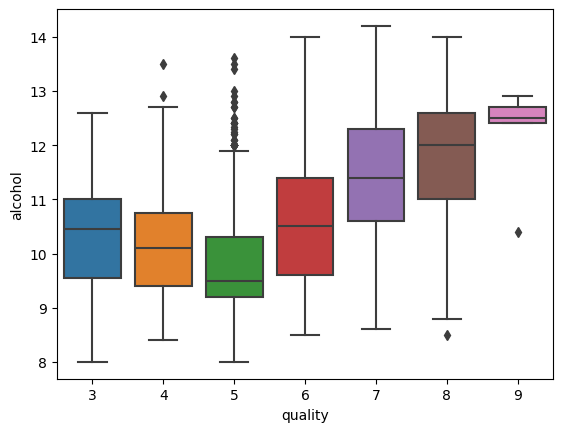

In [10]:
import seaborn as sns
for feature in features:
    sns.boxplot(x='quality',y=feature, data=data_white)
    plt.show()

<Axes: >

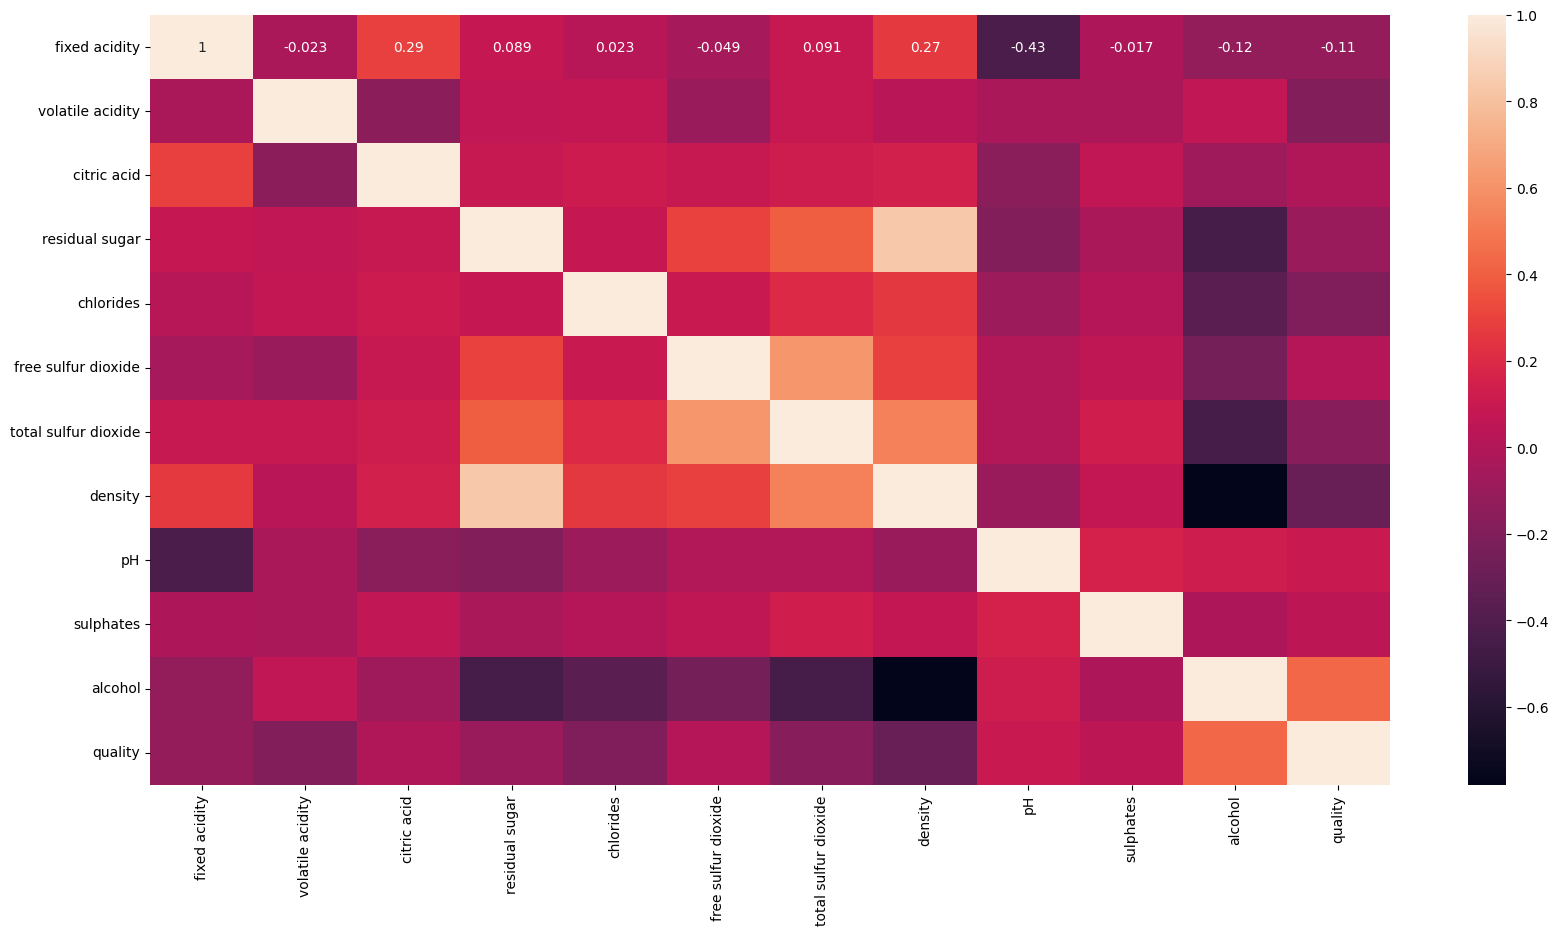

In [11]:
corr = data_white.corr()

# creat heatmap of correlation
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(corr, annot = True)

#Highly correlated variables are found 

Need to find the eigenvalues for the dataset 

In [12]:
scaler = StandardScaler().fit(pca_toy)
pca_toy_standard = pca_toy.copy()
pca_toy_standard[["density", "alcohol"]] = scaler.transform(pca_toy)
pca_toy_standard.head()

ValueError: Columns must be same length as key

In [13]:
scaler = StandardScaler().fit(data_white)
whitewine_scaled = scaler.transform(data_white)
whitewine_scaled=pd.DataFrame(whitewine_scaled,columns=data_white.columns)
whitewine_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


In [14]:
import seaborn as sns
#sns.pairplot(whitewine_scaled, corner=True)

In [15]:
white_pca = PCA().fit(whitewine_scaled)

In [16]:
whitewine_pca = data_white.copy()
# Separate features from the target variable


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(whitewine_pca)

# create tabular form for data after scaled
df_X_scaled = pd.DataFrame(X_scaled)
df_X_scaled.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free_sulfur dioxide', 'total sulfur_dioxide', 'density',
                'pH', 'sulphates', 'alcohol', 'Quality']

# print new data frame
df_X_scaled.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free_sulfur dioxide,total sulfur_dioxide,density,pH,sulphates,alcohol,Quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


In [58]:
pca = PCA()
pca.fit(X_scaled)

# Access the component matrix
component_matrix = pca.components_

# conver array to tabular
df_component_matrix = pd.DataFrame(component_matrix)

# Set the column names
df_component_matrix.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol', 'Quality']

# Define the desired index labels
index_labels = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC12']

# Replace the index labels
df_matrix =df_component_matrix.set_axis(index_labels, axis=0)

# Transpose the DataFrame
transposed_data = df_matrix.transpose()  # or data.T

# Print the transposed DataFrame
transposed_data

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC12
fixed acidity,0.156904,-0.560669,-0.207384,0.033735,0.244139,-0.105856,-0.223559,-0.130413,0.631450,0.200871,-0.104118,-0.170792
volatile acidity,0.024287,-0.016067,0.524915,-0.131197,0.702982,0.123705,0.223636,0.229607,0.031596,-0.141759,-0.270023,-0.013377
citric acid,0.132944,-0.289381,-0.446356,0.329533,0.065106,0.131959,0.120371,0.691419,-0.249495,-0.106329,-0.053956,-0.009649
residual sugar,0.406053,0.038824,-0.033843,-0.416156,-0.016102,-0.289919,0.338609,0.113294,-0.177303,0.374275,0.179873,-0.493565
chlorides,0.217544,-0.036911,0.214713,0.509612,-0.178292,0.409317,0.552255,-0.211397,0.179162,0.235528,0.091088,-0.025169
free sulfur dioxide,0.274719,0.345549,-0.312971,-0.148928,0.111172,0.488085,-0.224071,-0.128831,-0.101847,0.327334,-0.499213,0.029475
total sulfur dioxide,0.390441,0.272326,-0.124794,-0.021618,0.271448,0.272494,-0.203753,-0.012903,0.178008,-0.347358,0.643553,-0.035060
density,0.501296,0.017733,0.031968,-0.103864,-0.078344,-0.326008,0.123136,0.086671,0.125386,0.043492,-0.066860,0.761184
pH,-0.130037,0.567145,0.068484,0.204110,-0.112702,-0.192689,-0.077040,0.477961,0.520316,0.183756,-0.079113,-0.141843
sulphates,0.033642,0.248263,-0.226995,0.519245,0.456231,-0.479812,0.044622,-0.336428,-0.236625,0.055194,-0.041021,-0.042787


In [59]:
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create dataframes from the obtained values
eigenvalue_df = pd.DataFrame(eigenvalues)
explained_variance_ratio_df = pd.DataFrame(explained_variance_ratio)
cumulative_explained_variance_df = pd.DataFrame(cumulative_explained_variance)

# Concatenate the dataframes into a single dataframe
eigenvalue_proportion = pd.concat([eigenvalue_df, explained_variance_ratio_df, cumulative_explained_variance_df], axis=1)
eigenvalue_proportion.columns = ['Total', '%Variance', 'Cumulative%']
eigenvalue_proportion

,Total,%Variance,Cumulative%
0,3.347352,27.888907,27.888907
1,1.586414,13.217419,41.106326
2,1.371452,11.426434,52.532760
3,1.085083,9.040513,61.573273
4,0.975483,8.127361,69.700634
5,0.938955,7.823025,77.523659
6,0.769405,6.410402,83.934061
7,0.724042,6.032448,89.966509
8,0.556615,4.637509,94.604017
9,0.343003,2.857778,97.461796


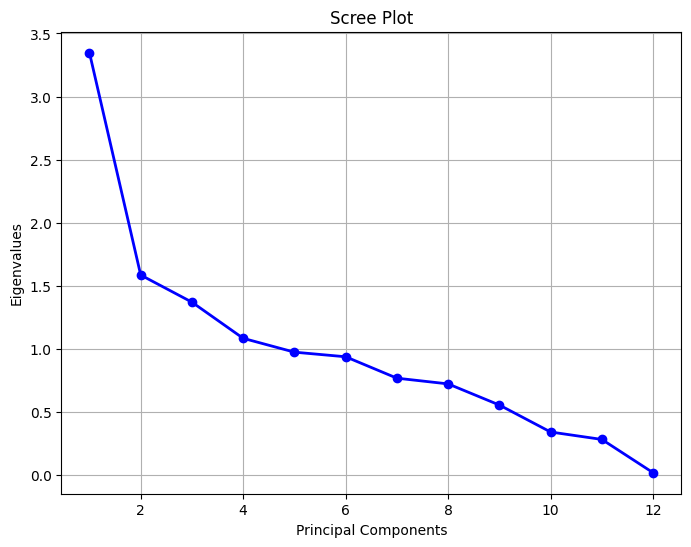

In [60]:
# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [62]:
# calculate communality of each component
# Drop columns 5 to 11, since there eigenvalue is below 1, according to scree plot 
transposed_data = transposed_data.drop(columns=transposed_data.columns[5:12])


# sum square each observation from PC1 to PC5
transposed_data['sum_of_squares'] = transposed_data.apply(lambda x: sum(x ** 2), axis=1)

transposed_data

,PC 1,PC 2,PC 3,PC 4,PC 5,sum_of_squares
fixed acidity,0.156904,-0.560669,-0.207384,0.033735,0.244139,0.442719
volatile acidity,0.024287,-0.016067,0.524915,-0.131197,0.702982,0.787780
citric acid,0.132944,-0.289381,-0.446356,0.329533,0.065106,0.413480
residual sugar,0.406053,0.038824,-0.033843,-0.416156,-0.016102,0.340977
chlorides,0.217544,-0.036911,0.214713,0.509612,-0.178292,0.386282
free sulfur dioxide,0.274719,0.345549,-0.312971,-0.148928,0.111172,0.327364
total sulfur dioxide,0.390441,0.272326,-0.124794,-0.021618,0.271448,0.316331
density,0.501296,0.017733,0.031968,-0.103864,-0.078344,0.269559
pH,-0.130037,0.567145,0.068484,0.204110,-0.112702,0.397616
sulphates,0.033642,0.248263,-0.226995,0.519245,0.456231,0.592055


In [63]:
# Create a PCA object with the desired number of components
pca = PCA(n_components=5)

# Fit and transform the data into principal components
principal_components = pca.fit_transform(X_scaled)

# convert principal component into dataframe
principal_components_df = pd.DataFrame(principal_components)
principal_components_df.columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5']

principal_components_df

,PC 1,PC 2,PC 3,PC 4,PC 5
0,3.543318,-0.355087,-0.325833,-1.735411,-0.400868
1,-0.612800,0.289411,0.816434,0.848734,-0.527425
2,0.142394,-1.168021,-0.153068,0.190920,-0.306209
3,1.379525,0.199587,-0.324497,-0.408824,-0.520039
4,1.379525,0.199587,-0.324497,-0.408824,-0.520039
...,...,...,...,...,...
4893,-2.075943,0.322175,0.108275,0.443837,-0.755969
4894,1.479426,0.406234,0.353999,-0.144866,0.163807
4895,-0.751632,-0.511206,0.615696,-0.250844,-0.807127
4896,-3.622997,0.939777,0.002756,-0.845937,-0.186136


<Axes: >

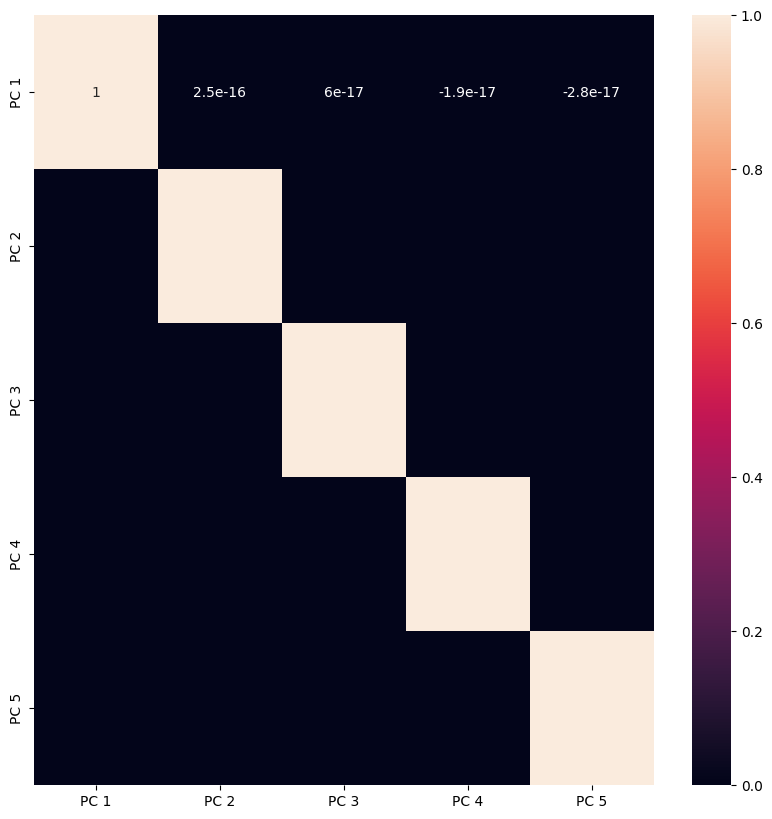

In [64]:
# visualize correlation with heatmap
# check correlation among variables
corr = principal_components_df.corr()

# creat heatmap of correlation
plt.figure(figsize = [10, 10], facecolor = 'white')
sns.heatmap(corr, annot = True)

## FA 